<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Fundamental Concepts</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

### Proving Central Limit Theorm

In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
import random 
plt.style.use('seaborn-darkgrid')

Many statistical procedures assume that data follows a normal distribution, because the normal distribution has nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to mirror the distribution of the population. This means a sample taken from a population with a skewed distribution will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking the skew:

In [65]:
np.random.seed(5)

#Creating a Bimodal Distribution

population_ages1 = stats.poisson.rvs(loc = 18, mu = 35, size = 150000)
population_ages2 = stats.poisson.rvs(loc = 18, mu = 10, size = 100000)

population_ages = np.concatenate((population_ages1, population_ages2))


In [66]:
population_ages.mean() 

43.005308

In [67]:
sample_ages = np.random.choice(a = population_ages, size = 500)
sample_ages.mean()

43.156

In [68]:
sample_ages.mean() - population_ages.mean() 

0.15069199999999938

Our point estimate is based on the sample size of 500 is 0.76 years apart from the population
This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup. For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample:

In [69]:
random.seed(4)

population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)

demographics_sample = random.sample(population_races, 1000)

for race in set(demographics_sample):
    print(race + 'Proportion Estimate:')
    print(demographics_sample.count(race)/1000)
    

otherProportion Estimate:
0.128
hispanicProportion Estimate:
0.189
whiteProportion Estimate:
0.406
asianProportion Estimate:
0.103
blackProportion Estimate:
0.174


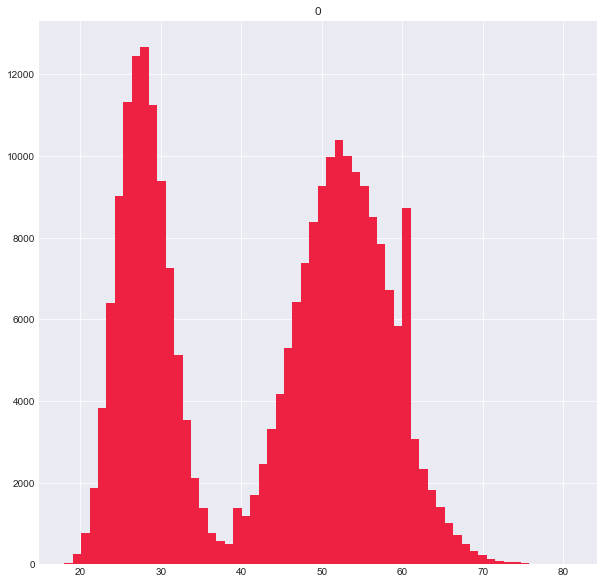

In [78]:
pd.DataFrame(population_ages).hist(bins=60, figsize=(10,10), color = '#ef2143')
plt.show()

The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population should have roughly the same shape and skew:

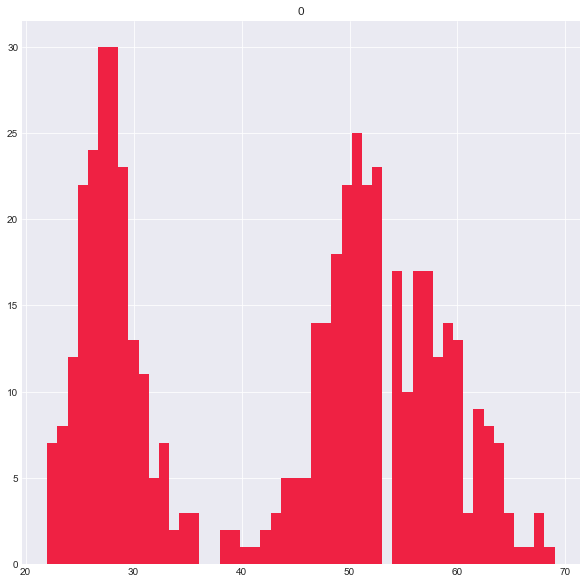

In [77]:
pd.DataFrame(sample_ages).hist(bins=50, figsize=(10,10), color = '#ef2143')
plt.show()

The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.

The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

In [79]:
np.random.seed(5)

estimate_points = list()

for sample in range(200):
    sample = np.random.choice(a= population_ages, size=500)
    estimate_points.append( sample.mean() )

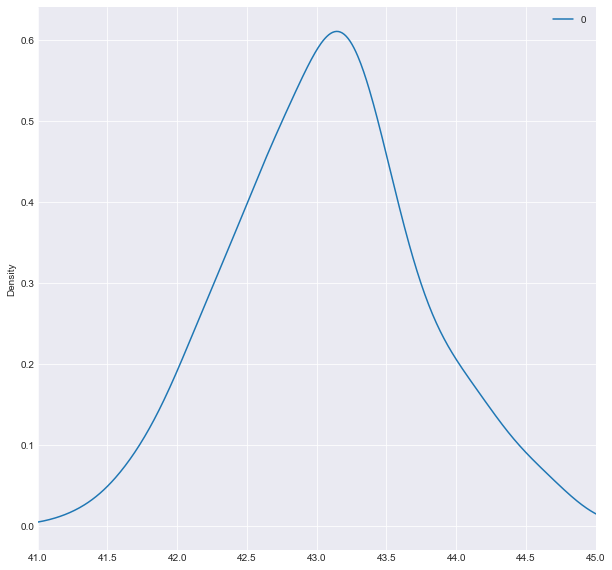

In [84]:
pd.DataFrame(estimate_points).plot(kind = 'density', xlim = (41, 45),figsize = (10,10))
plt.show()

The sampling distribution appears to be fairly normal in nature, despite the orignal data set being bimodal in nature 


#### The mean of sampling distribution approaches the mean of the orignal distribution

In [87]:
np.array(estimate_points).mean() - population_ages.mean() 

0.059371999999996206

### Hence Proved